In [1]:
import numpy as np
import dimarray as da
import xarray as xr
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [2]:
ptt = '/home/beckmann/mnt/cluhome/icedata/data_greenland/bedrock_lth/'
pt_bed = '/home/beckmann/mnt/cluhome/icedata/pism_greenland_input/BedMachine/'
visc3dfile = ptt +'visc_pism_greenland_18km.nc'
bed_in = pt_bed +'pism_Greenland_18000m_mcb_jpl_v_no_bath.nc'

In [3]:
bed_data= da.read_nc(bed_in,'bed')
mask_bed = bed_data.values ==-9999
mask_bed = ~mask_bed

In [4]:
mask_data= da.read_nc(bed_in,'mask')
mask_m = mask_data.values >0

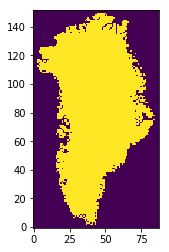

In [5]:
plt.imshow(mask_m, origin = 'lower')

In [6]:
eradius=6371.0
rad = xr.open_dataset(visc3dfile)
depth = rad.radius.values*1e-3-eradius

#### find all depth between -100 and -300m 

In [7]:
levs =[]
depth_levs=[]
for i,de in enumerate(depth):
    if (de < -95)&(de > -306):
        levs.append(i)
        depth_levs.append(de)

In [8]:
def plot_at_lev(visc3dfile,lev):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    
    f,ax = plt.subplots(1,1,figsize= (6,8))
    im0 =ax.imshow(lgvisc, origin = 'lower',cmap =plt.cm.RdBu)
#     cb0 = plt.colorbar(im0, ax=ax,orientation="vertical",format='$%.2e$',shrink=0.6)
    cbar1 =f.colorbar(im0, ax = ax,label = 'upper mantle viscosity in (Pa s)',shrink=0.6)
    i = np.where(np.asarray(levs) == lev)[0][0]
    radius = depth_levs[i]
#     ax.text(-500000,-100000,str(radius)+'km',fontsize=12)
    mn = np.nanmean(lgvisc)
    mmn =np.round((mn /1e21),3)
    ax.text(0.5,0.1,'@ ' +str(radius)+'km mean '+ str(mmn)+ '$10^{21}$',fontsize = 14)
    ax.axis('off')
def plot_at_lev_mask(visc3dfile,lev, m):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    lgvisc_mask =lgvisc.copy()
    lgvisc_mask[~m]=np.nan
    f,ax = plt.subplots(1,1,figsize= (6,8))
    im0 =ax.imshow(lgvisc_mask, origin = 'lower',cmap =plt.cm.RdBu)
#     cb0 = plt.colorbar(im0, ax=ax,orientation="vertical",format='$%.2e$',shrink=0.6)
    cbar1 =f.colorbar(im0, ax = ax,label = 'upper mantle viscosity in (Pa s)',shrink=0.6)
    i = np.where(np.asarray(levs) == lev)[0][0]
    radius = depth_levs[i]
    mn = np.nanmean(lgvisc_mask)
    mmn =np.round((mn /1e21),3)
    ax.text(0.5,0.1,'@ ' +str(radius)+'km mean '+ str(mmn)+ '$10^{21}$',fontsize = 14)
    ax.axis('off')

    
def getmean_at_lev(visc3dfile,lev):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    mn = np.nanmean(lgvisc)
    return(mn)


def getmax_at_lev(visc3dfile,lev):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    mn = np.nanmax(lgvisc)
    return(mn)
def getmin_at_lev(visc3dfile,lev):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    mn = np.nanmin(lgvisc)
    return(mn)

def getmean_at_lev_mask(visc3dfile,lev, m):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    lgvisc_mask =lgvisc.copy()
    lgvisc_mask[~m]=np.nan
   
    mn = np.nanmean(lgvisc_mask)
    return(mn)
    
    
def getmax_at_lev_mask(visc3dfile,lev, m):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    lgvisc_mask =lgvisc.copy()
    lgvisc_mask[~m]=np.nan
   
    mn = np.nanmax(lgvisc_mask)
    return(mn)
    
def getmin_at_lev_mask(visc3dfile,lev, m):
    rad = xr.open_dataset(visc3dfile)
    visc = rad["lgvisc"].values[lev,:,:]
    lgvisc = 10.0**visc
    lgvisc_mask =lgvisc.copy()
    lgvisc_mask[~m]=np.nan
   
    mn = np.nanmin(lgvisc_mask)
    return(mn)
    


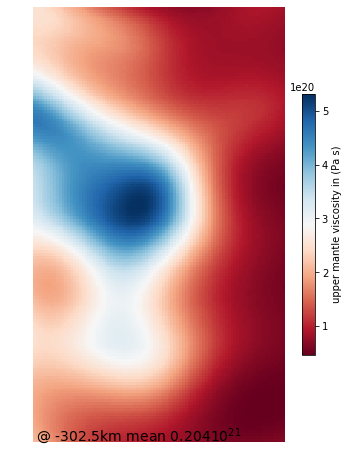

In [9]:
plot_at_lev(visc3dfile,103)

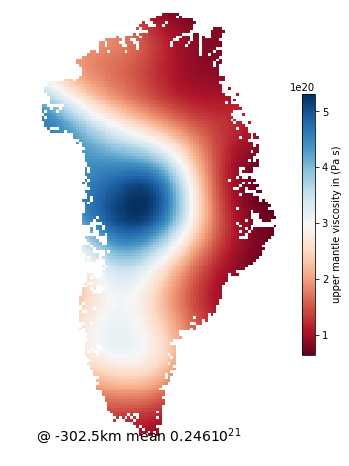

In [10]:
plot_at_lev_mask(visc3dfile,103,mask_m)

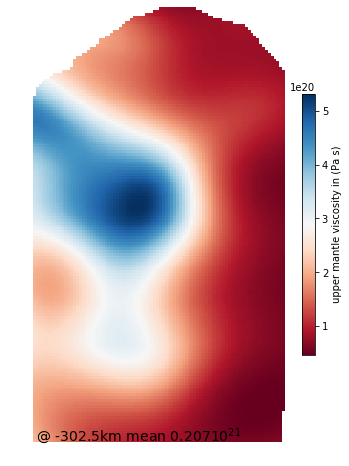

In [11]:
plot_at_lev_mask(visc3dfile,103,mask_bed)

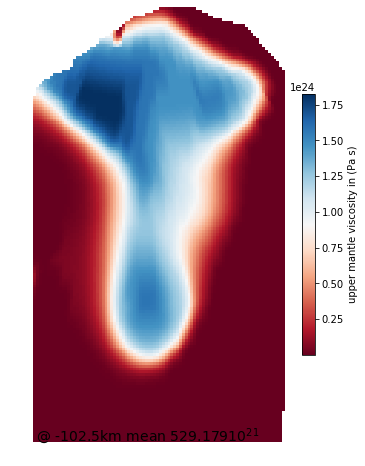

In [12]:
plot_at_lev_mask(visc3dfile,143,mask_bed)

## now get  values for each depth

In [13]:
levs =[]
depth_levs=[]
for i,de in enumerate(depth):
    if (de < -225)&(de > -410):
        levs.append(i)
        depth_levs.append(de)

In [14]:
visc_all =[]
visc_gris =[]
visc_bed =[]
for lev in levs:
    val = getmean_at_lev(visc3dfile,lev)
    visc_all.append(val)
    val2 = getmean_at_lev_mask(visc3dfile,lev, mask_m)
    visc_gris.append(val2)
    val3 = getmean_at_lev_mask(visc3dfile,lev, mask_bed)
    visc_bed.append(val3)

Text(0, 0.5, 'depth(m)')

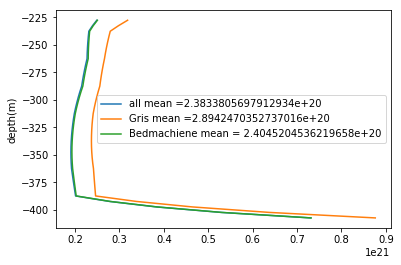

In [15]:
f,ax = plt.subplots(1,1)
plt.plot(visc_all,depth_levs,label = 'all mean ='+ str(np.mean(visc_all)))
plt.plot(visc_gris,depth_levs,label = 'Gris mean =' + str(np.mean(visc_gris)))
plt.plot(visc_bed,depth_levs,label = 'Bedmachiene mean = '+ str(np.mean(visc_bed)))
plt.legend()

plt.ylabel('depth(m)')

## get max

In [37]:
levs =[]
depth_levs=[]
for i,de in enumerate(depth):
    if (de < -225)&(de > -410):
        levs.append(i)
        depth_levs.append(de)

In [38]:
visc_all =[]
visc_gris =[]
visc_bed =[]
for lev in levs:
    val = getmax_at_lev(visc3dfile,lev)
    visc_all.append(val)
    val2 = getmax_at_lev_mask(visc3dfile,lev, mask_m)
    visc_gris.append(val2)
    val3 = getmax_at_lev_mask(visc3dfile,lev, mask_bed)
    visc_bed.append(val3)

Text(0, 0.5, 'depth(m)')

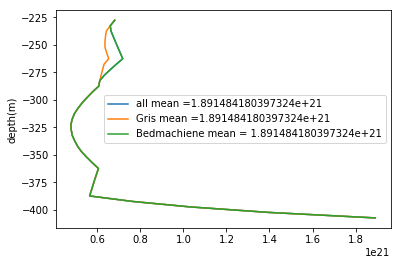

In [39]:
f,ax = plt.subplots(1,1)
plt.plot(visc_all,depth_levs,label = 'all mean ='+ str(np.max(visc_all)))
plt.plot(visc_gris,depth_levs,label = 'Gris mean =' + str(np.max(visc_gris)))
plt.plot(visc_bed,depth_levs,label = 'Bedmachiene mean = '+ str(np.max(visc_bed)))
plt.legend()

plt.ylabel('depth(m)')

## get min

In [40]:
levs =[]
depth_levs=[]
for i,de in enumerate(depth):
    if (de < -225)&(de > -410):
        levs.append(i)
        depth_levs.append(de)

In [41]:
visc_all =[]
visc_gris =[]
visc_bed =[]
for lev in levs:
    val = getmin_at_lev(visc3dfile,lev)
    visc_all.append(val)
    val2 = getmin_at_lev_mask(visc3dfile,lev, mask_m)
    visc_gris.append(val2)
    val3 = getmin_at_lev_mask(visc3dfile,lev, mask_bed)
    visc_bed.append(val3)

Text(0, 0.5, 'depth(m)')

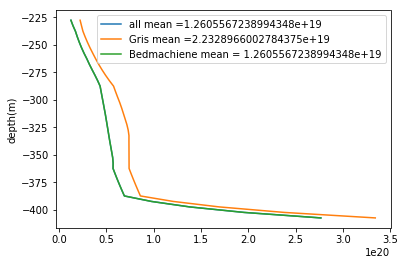

In [42]:
f,ax = plt.subplots(1,1)
plt.plot(visc_all,depth_levs,label = 'all mean ='+ str(np.min(visc_all)))
plt.plot(visc_gris,depth_levs,label = 'Gris mean =' + str(np.min(visc_gris)))
plt.plot(visc_bed,depth_levs,label = 'Bedmachiene mean = '+ str(np.min(visc_bed)))
plt.legend()

plt.ylabel('depth(m)')

In [17]:
#all depths

In [24]:
levs =[]
depth_levs=[]
for i,de in enumerate(depth):
    if (de < -150)&(de > -700):
        levs.append(i)
        depth_levs.append(de)

Text(0, 0.5, 'depth(m)')

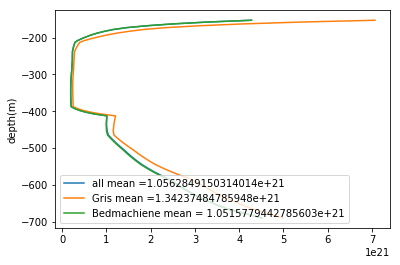

In [26]:
visc_all =[]
visc_gris =[]
visc_bed =[]
for lev in levs:
    val = getmean_at_lev(visc3dfile,lev)
    visc_all.append(val)
    val2 = getmean_at_lev_mask(visc3dfile,lev, mask_m)
    visc_gris.append(val2)
    val3 = getmean_at_lev_mask(visc3dfile,lev, mask_bed)
    visc_bed.append(val3)



In [27]:
f,ax = plt.subplots(1,1)
plt.plot(visc_all,depth_levs,label = 'all mean ='+ str(np.mean(visc_all)))
plt.plot(visc_gris,depth_levs,label = 'Gris mean =' + str(np.mean(visc_gris)))
plt.plot(visc_bed,depth_levs,label = 'Bedmachiene mean = '+ str(np.mean(visc_bed)))
plt.legend(loc = 3)

plt.ylabel('depth(m)')

2.548193738605544e+20

In [27]:
levs =[]
depth_levs=[]
for i,de in enumerate(depth):
    if (de < -80)&(de > -400):
        levs.append(i)
        depth_levs.append(de)

In [28]:
visc_all =[]
visc_gris =[]
visc_bed =[]
for lev in levs:
    val = getmean_at_lev(visc3dfile,lev)
    visc_all.append(val)
    val2 = getmean_at_lev_mask(visc3dfile,lev, mask_m)
    visc_gris.append(val2)
    val3 = getmean_at_lev_mask(visc3dfile,lev, mask_bed)
    visc_bed.append(val3)



Text(0, 0.5, 'depth(m)')

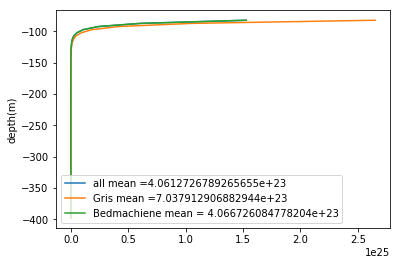

In [29]:
f,ax = plt.subplots(1,1)
plt.plot(visc_all,depth_levs,label = 'all mean ='+ str(np.mean(visc_all)))
plt.plot(visc_gris,depth_levs,label = 'Gris mean =' + str(np.mean(visc_gris)))
plt.plot(visc_bed,depth_levs,label = 'Bedmachiene mean = '+ str(np.mean(visc_bed)))
plt.legend(loc = 3)

plt.ylabel('depth(m)')